In [1]:
import pyarrow.feather as feather
import pandas as pd
# 设置 Pandas 显示选项
pd.set_option('display.max_columns', None)  # 显示所有列
pd.set_option('display.width', 200)       # 设置显示宽度，防止换行
pd.set_option('display.max_rows', 20)      # 只显示 20 行数据（可根据需要调整）
# 文件路径
file_path = "/mnt/nvme2/yyc/medical-coding/files/data/mimiciii_full/mimiciii_full.feather"
# 读取 feather 文件
data = feather.read_table(file_path)
# 转换为 pandas DataFrame
df = data.to_pandas()
# 打印数据框
print(df)

       subject_id     _id      DESCRIPTION                                               text                                             cpt_id                                          icd9_diag  \
0               3  145834           Report  admission date discharge date date of birth se...                                     [94002, 94003]  [785.59, 682.6, 425.4, 410.71, 038.9, 584.9, 4...   
1               4  185777           Report  admission date discharge date date of birth se...                [99233, 99223, 99238, 99231, 99232]  [E931.7, 799.4, 041.11, 136.3, 571.5, 790.7, 2...   
2               6  107064           Report  admission date discharge date date of birth se...         [99239, 99255, 99291, 99233, 99231, 99232]  [403.91, 276.6, 444.0, V15.82, 997.2, 276.7, 2...   
3               9  150750  Report+Addendum  admission date discharge date date of birth se...                                            [94003]           [276.5, 584.9, 431, 507.0, 401.9, 428.0]   
4    

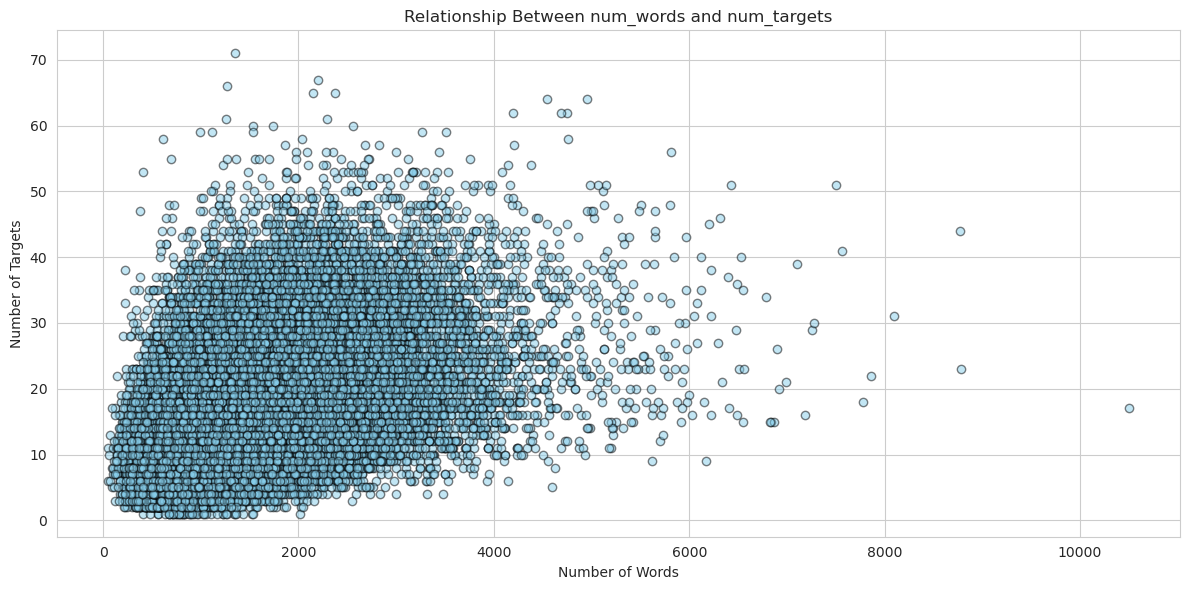

In [2]:
import matplotlib.pyplot as plt

# 可视化 num_words 与 num_targets 的关系
plt.figure(figsize=(12, 6))
plt.scatter(df['num_words'], df['num_targets'], alpha=0.5, color='skyblue', edgecolor='black')
plt.title('Relationship Between num_words and num_targets')
plt.xlabel('Number of Words')
plt.ylabel('Number of Targets')
plt.tight_layout()
plt.show()

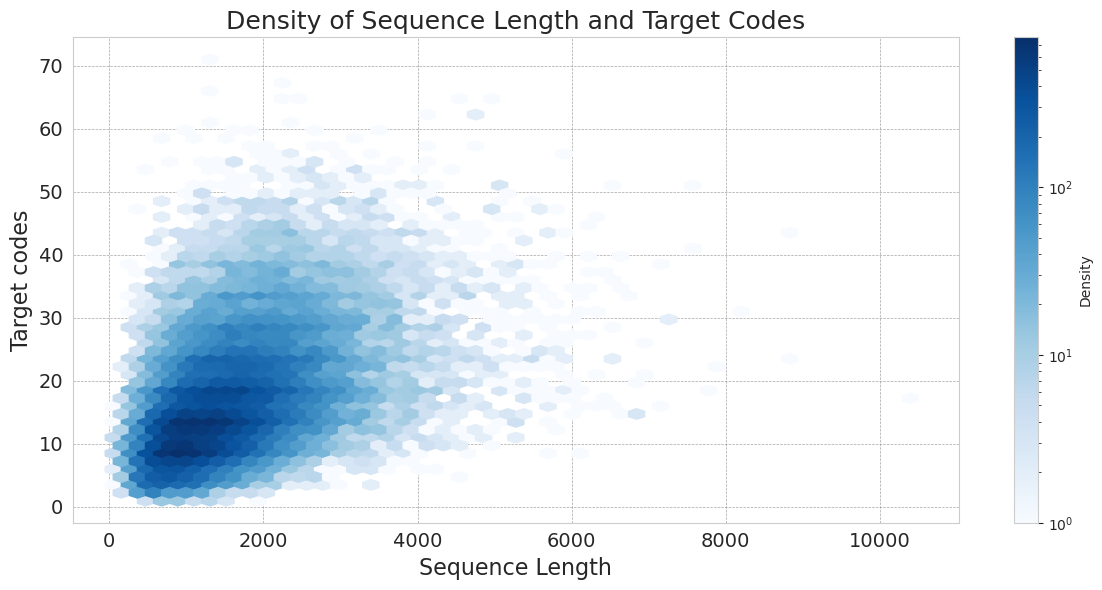

In [13]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(12, 6))
plt.hexbin(
    df['num_words'], df['num_targets'], 
    gridsize=50, cmap='Blues', norm=LogNorm(), mincnt=1
)
plt.colorbar(label='Density', orientation='vertical')
plt.title('Density of Sequence Length and Target Codes', fontsize=18)
plt.xlabel('Sequence Length', fontsize=16)
plt.ylabel('Target codes', fontsize=16)
# 调整坐标轴刻度字体大小
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# 添加网格线并设置 zorder
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7, zorder=10)

# 确保网格线不被遮挡
plt.tight_layout()
plt.show()



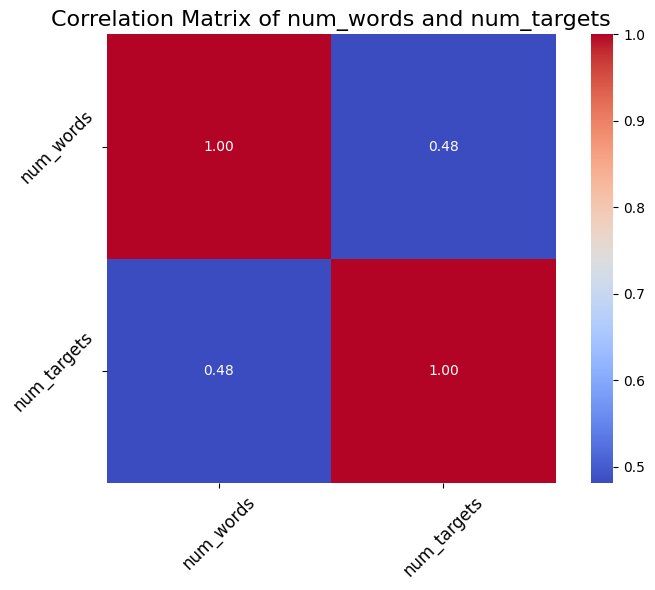

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算相关性矩阵
correlation_matrix = df[['num_words', 'num_targets']].corr()

# 绘制热力图可视化相关性
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    cbar=True, 
    square=True
)
plt.title("Correlation Matrix of num_words and num_targets", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

In [28]:
# 根据 num_words和 num_targets 添加难度标签
def assign_difficulty(row):
    if row['num_words'] <= 1500 and row['num_targets'] <= 10:
        return 'easy'
    elif 1500 < row['num_words'] <= 3000 and 10 < row['num_targets'] <= 25:
        return 'middle'
    else:
        return 'hard'

df['difficulty'] = df.apply(assign_difficulty, axis=1)
print(df)

# 保存为新文件
output_path = "/mnt/nvme2/yyc/medical-coding/files/data/mimiciii_full/mimiciii_full_difficulty_from_targets&words.feather"
df.to_feather(output_path)


       subject_id     _id      DESCRIPTION                                               text                                             cpt_id                                          icd9_diag  \
0               3  145834           Report  admission date discharge date date of birth se...                                     [94003, 94002]  [263.9, 428.0, 425.4, 682.6, 410.71, 785.59, 0...   
1               4  185777           Report  admission date discharge date date of birth se...                [99231, 99238, 99232, 99233, 99223]  [042, V09.0, E931.7, 041.11, 571.5, 276.3, 136...   
2               6  107064           Report  admission date discharge date date of birth se...         [99231, 99239, 99291, 99232, 99233, 99255]  [276.6, 997.2, 285.9, V15.82, 275.3, 444.0, 40...   
3               9  150750  Report+Addendum  admission date discharge date date of birth se...                                            [94003]           [428.0, 401.9, 276.5, 507.0, 431, 584.9]   
4    

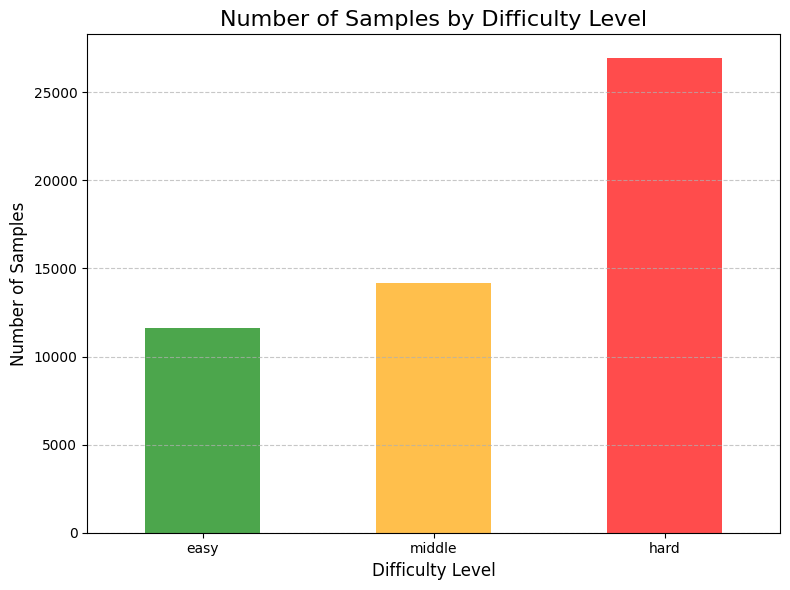

In [31]:
import matplotlib.pyplot as plt

# 确保按照 easy, middle, hard 的顺序排列
difficulty_order = ['easy', 'middle', 'hard']
difficulty_counts = df['difficulty'].value_counts().reindex(difficulty_order)

# 绘制柱状图可视化
plt.figure(figsize=(8, 6))
difficulty_counts.plot(kind='bar', color=['green', 'orange', 'red'], alpha=0.7)
plt.title('Number of Samples by Difficulty Level', fontsize=16)
plt.xlabel('Difficulty Level', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
